<a href="https://colab.research.google.com/github/IngerMasha/week14/blob/main/day2/Exercises_XP_Ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

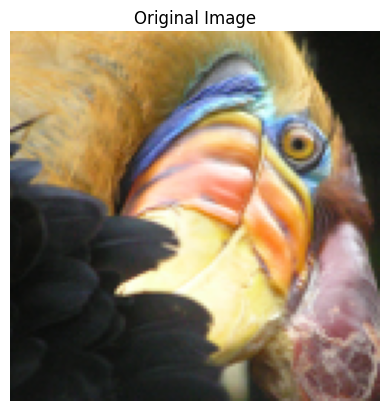

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('bird_small.mat')
A = data['A']

A = A / 255.0

m, n, _ = A.shape
A = A.reshape(m * n, 3)

original_image = A.reshape(m, n, 3)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


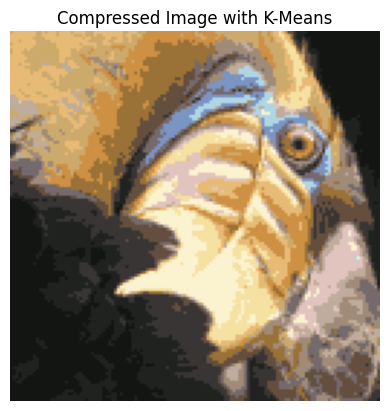

In [3]:
def init_centroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    rand_indices = np.random.permutation(m)
    centroids = X[rand_indices[:K]]
    return centroids
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)

    return idx

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points_assigned = X[idx == k]
        centroids[k] = np.mean(points_assigned, axis=0)

    return centroids

def run_k_means(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx
K = 16
initial_centroids = init_centroids(A, K)
max_iters = 10
centroids, idx = run_k_means(A, initial_centroids, max_iters)

A_recovered = centroids[idx.astype(int)]
compressed_image = A_recovered.reshape(m, n, 3)

plt.imshow(compressed_image)
plt.title('Compressed Image with K-Means')
plt.axis('off')
plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'X'])


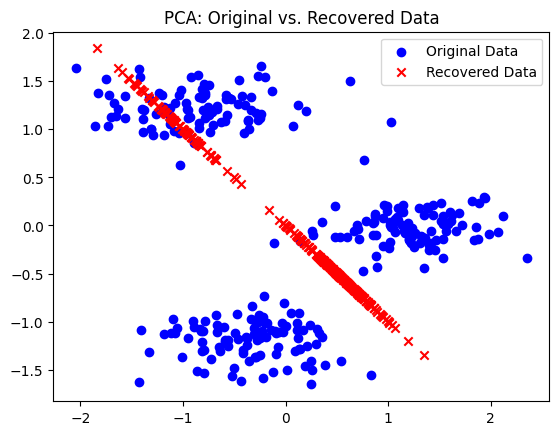

In [8]:
data_pca = scipy.io.loadmat('/content/ex7data2.mat')

print(data_pca.keys())
X_pca = data_pca['X']

X_pca = (X_pca - np.mean(X_pca, axis=0)) / np.std(X_pca, axis=0)

def pca(X):
    m, n = X.shape
    Sigma = (X.T @ X) / m
    U, S, V = np.linalg.svd(Sigma)
    return U, S

U, S = pca(X_pca)

def project_data(X, U, K):
    U_reduced = U[:, :K]
    Z = X @ U_reduced
    return Z

K = 1
Z = project_data(X_pca, U, K)

def recover_data(Z, U, K):
    U_reduced = U[:, :K]
    X_recovered = Z @ U_reduced.T
    return X_recovered

X_recovered = recover_data(Z, U, K)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Original Data')
plt.scatter(X_recovered[:, 0], X_recovered[:, 1], c='red', marker='x', label='Recovered Data')
plt.title('PCA: Original vs. Recovered Data')
plt.legend()
plt.show()